<div style = "text-align: center;">
    <h1>
        SALES DATA ANALYSIS
    </h1>
</div>


<h2>Importing necessary libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

<h2>Loading the Dataset</h2>

In [2]:
data = pd.read_excel("ECOMM DATA.xlsx")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
data.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

<h2>Data Cleaning</h2>

In [4]:
data['Postal Code'].isnull().sum()

41296

In [5]:
data=data.drop(columns=['Postal Code'])

<h2>1. Calculating Total Sales</h2>

In [6]:
total_sales = data['Sales'].sum()
print("TOTAL SALES:",f"$ {total_sales:,.2f}")

TOTAL SALES: $ 12,642,501.91


<h2>2. Analysing sales trends over time</h2>

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Day'] = data['Order Date'].dt.day
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year
data['Week'] = data['Order Date'].dt.isocalendar().week
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Day,Month,Year,Week
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.650,7,0.0,762.1845,933.57,Critical,31,7,2012,31
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.7650,923.63,Critical,5,2,2013,6
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,5175.171,9,0.1,919.9710,915.49,Medium,17,10,2013,42
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,2892.510,5,0.1,-96.5400,910.16,Medium,28,1,2013,5
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,2832.960,8,0.0,311.5200,903.04,Critical,5,11,2013,45


In [8]:
daily_sales = data.groupby('Order Date')['Sales'].sum()
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()
quarterly_sales = data.groupby(data['Order Date'].dt.to_period('Q'))['Sales'].sum()
yearly_sales = data.groupby(data['Order Date'].dt.year)['Sales'].sum()

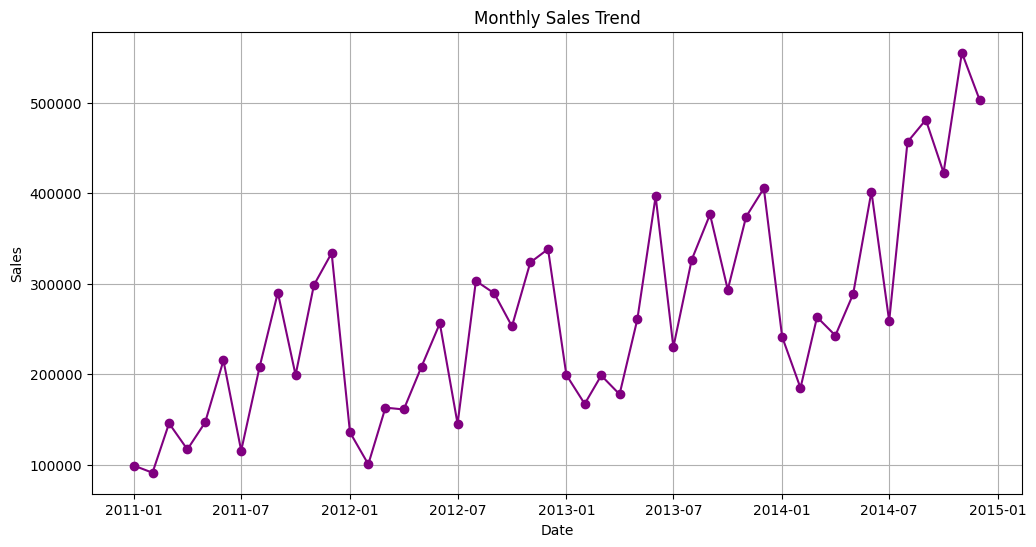

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales, marker='o',color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

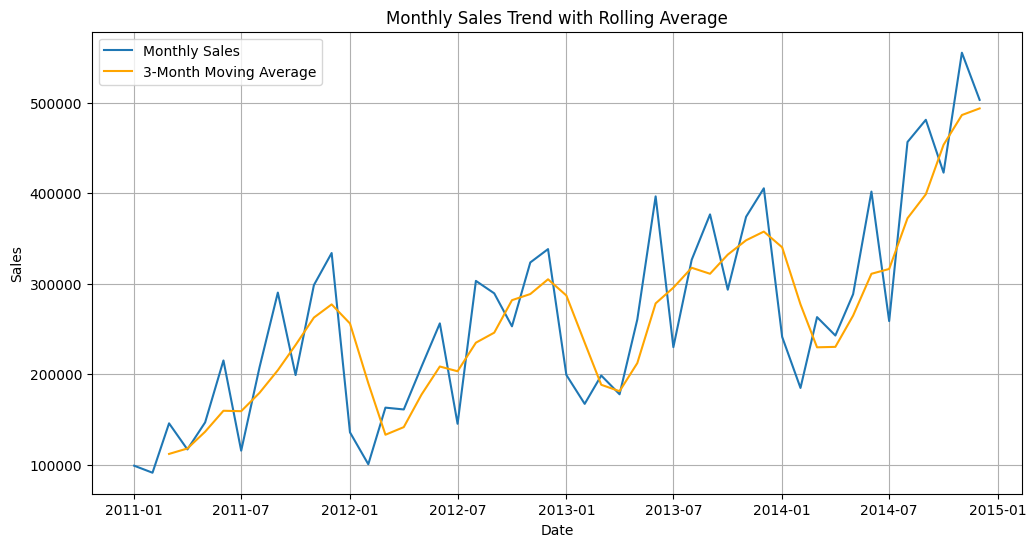

In [10]:
monthly_sales_rolling = monthly_sales.rolling(window=3).mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales, label='Monthly Sales')
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales_rolling, label='3-Month Moving Average', color='orange')
plt.title('Monthly Sales Trend with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

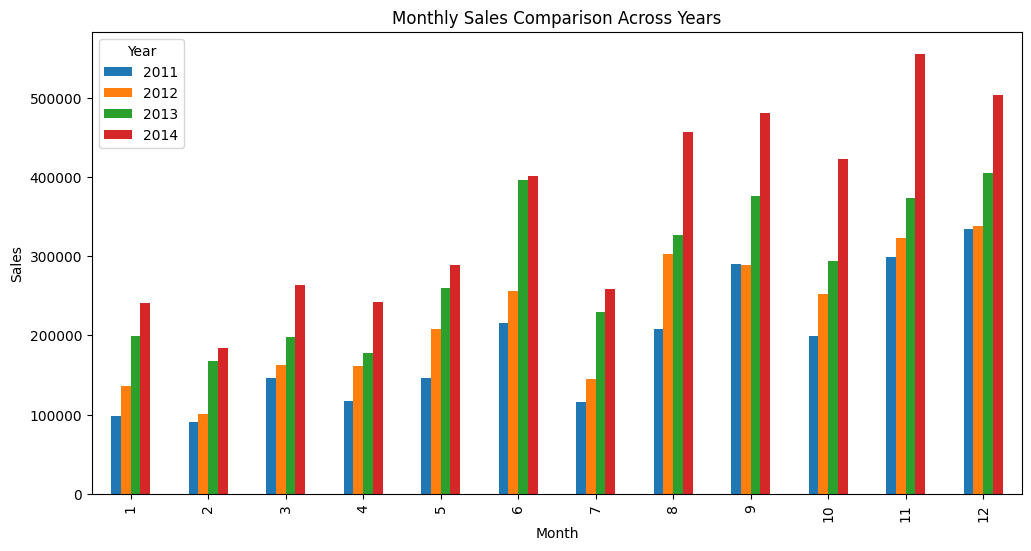

In [11]:
monthly_sales_pivot = data.pivot_table(values='Sales', index='Month', columns='Year', aggfunc='sum')
monthly_sales_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Sales Comparison Across Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

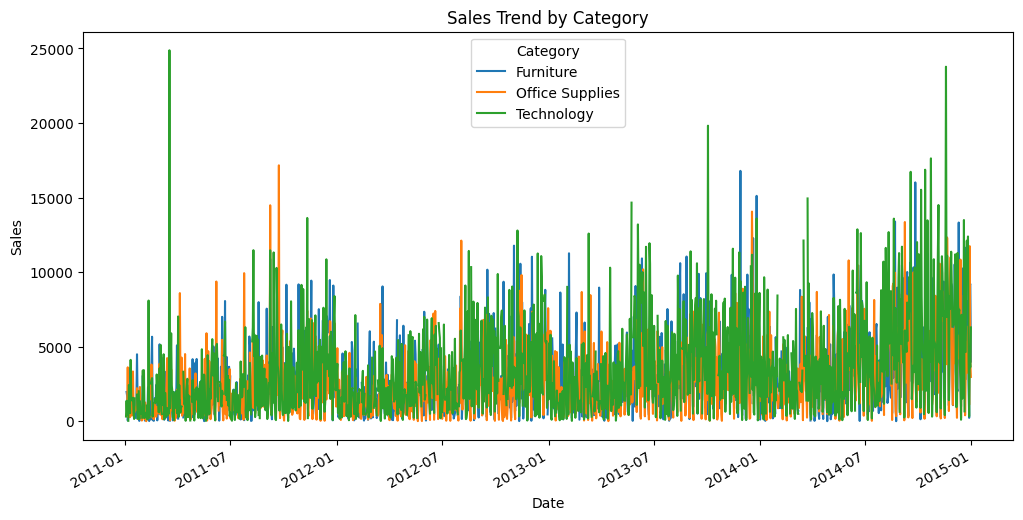

In [12]:
category_sales = data.groupby(['Order Date', 'Category'])['Sales'].sum().unstack()
category_sales.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trend by Category')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

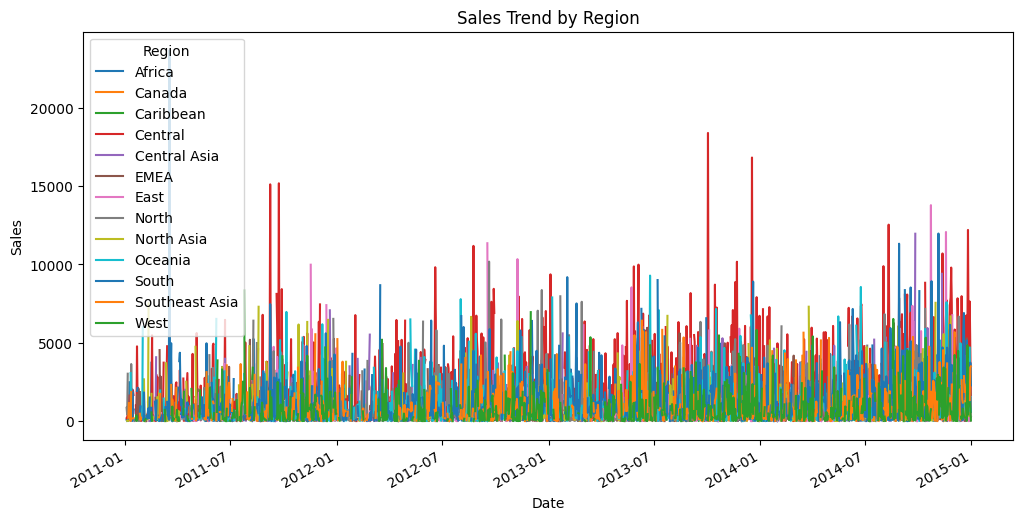

In [13]:
region_sales = data.groupby(['Order Date', 'Region'])['Sales'].sum().unstack()
region_sales.plot(kind='line', figsize=(12, 6))
plt.title('Sales Trend by Region')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


<h2>3. Determining Best Selling Products</h2>

In [14]:
best_selling_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

In [15]:
top_10_products=best_selling_products.head(10)

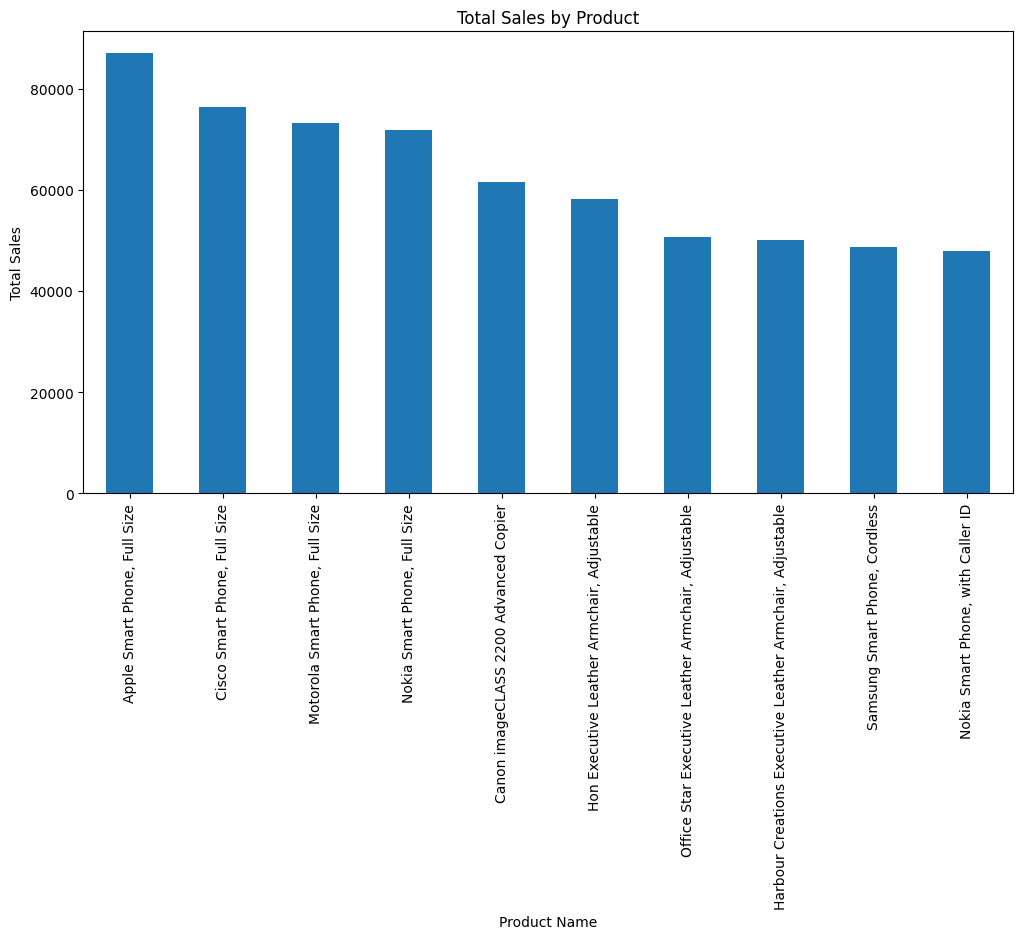

In [16]:
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

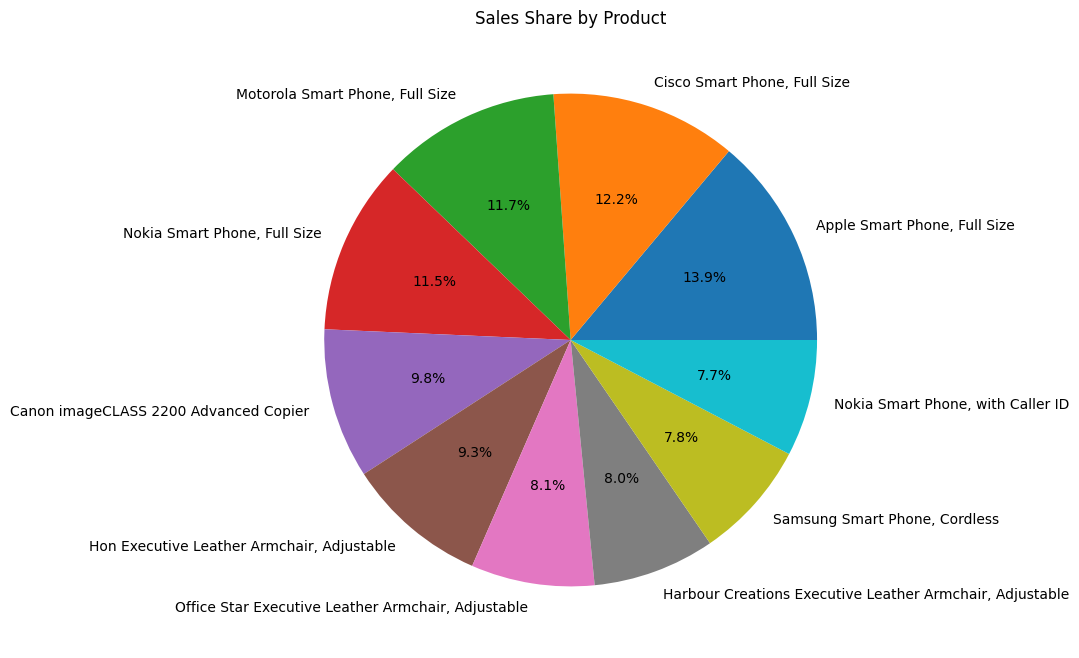

In [17]:
plt.figure(figsize=(8, 8))
top_10_products.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Share by Product')
plt.ylabel('')
plt.show()